# Solving the Cart Pole problem with vanilla policy gradient algorithm

In [1]:
import os
import math
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12, 8]
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import gym
import CartPole as cp
import pickle

## Agent training

In [2]:
env = gym.make('CartPole-v1')

Set `True` the variable below if you would train the agent. If `False`, the code picks the trained agent from the cache.

In [3]:
training_mode = False

The method `train()` alllows to run a training session of the reinforcemente learning agent.

In [4]:
if training_mode:
    # Define a new agent
    agent = cp.Agent(env)
    # Train the agent for 2500 epochs
    agent.train(env, n_episodes=3000)
    # Save the agent
    with open('cache/agent.pickle', 'wb') as file:
        pickle.dump(agent, file)
else:
    # Load the trained agent
    with open('cache/agent.pickle', 'rb') as file:
        agent = pickle.load(file)

Consider the learning of the agent is incremental, so you can call `agent.train()` more times and start a new training session from the last session.

## Training evaluation

### Learning curve

The class `Agent` stores the total rewards by episode earned during the training session. By calling the method `train_history()`, you can get the training rewards. Furthermore, you can pass a value (`bin_window`) to reduce the vector in bins and return the mean of rewards within bins. This feature can be used to quickly smooth the learning curve.

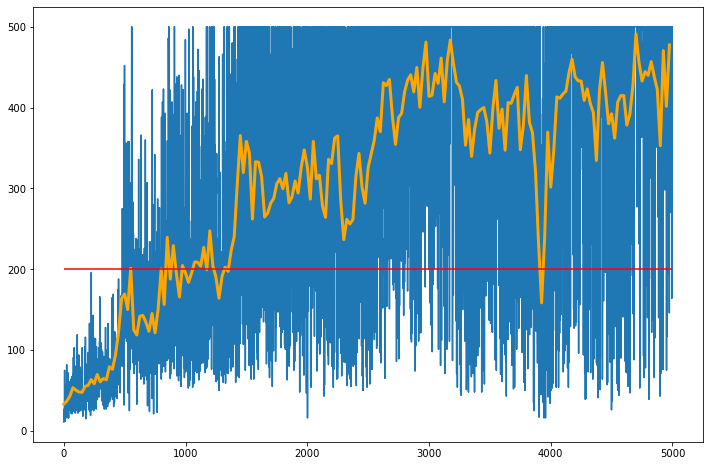

In [5]:
n_episodes = len(agent.train_history())

plt.plot(agent.train_history())

bin_size = 25
bin_avg = agent.train_history(bin_size)
plt.plot(np.array([*range(len(bin_avg))])*bin_size, bin_avg, color='orange', linewidth=3)

plt.hlines(y=200, xmin=0, xmax=n_episodes, color='red')

plt.show()

## Playing an episode

The agent comes with a `play` method, allowing to run an episode and get some performance indicators of the round. The argument `render` manage the rendering of the round, while `sleep` slows the presentation of frames. You can wrap the environment in order to save the episode into a video file.

In [7]:
# Optional: run if you need to save the render of the episode
env = gym.wrappers.Monitor(env, 'playing-session', video_callable=lambda episode_id: True)
# Use the agent to land on the Moon!
cp.play(env, agent, render=True, sleep=0.01)

{'duration': 500, 'reward': 500.0, 'solved': True}

## Evaluate performances

To evaluate the performances of the agent, the game is run 1000 times.

In [6]:
if training_mode:
    performances = [cp.play(env, agent) for i in range(1000)]
    with open('cache/performances.pickle', 'wb') as file:
        pickle.dump(performances, file)
else:
    with open('cache/performances.pickle', 'rb') as file:
        performances = pickle.load(file)

solved = [episode['solved'] for episode in performances]
reward = [episode['reward'] for episode in performances]

print('Proportion of solved:', np.mean(solved))

Proportion of solved: 0.932


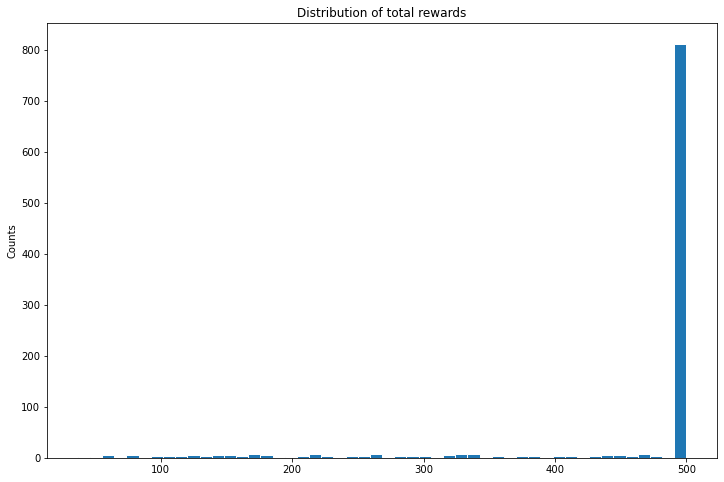

In [7]:
rewards = np.array([episode['reward'] for episode in performances])
plt.hist(rewards, bins=50, density=False, edgecolor='white')
plt.title('Distribution of total rewards')
plt.ylabel('Counts')
plt.show()

In [8]:
print('Mean of total rewards: %.2f' % np.mean(reward) )

Mean of total rewards: 455.88


In [9]:
print('Median of total rewards: %.2f' % np.median(reward) )

Median of total rewards: 500.00


In [10]:
print('The 95%% of total rewards is between %.2f and %.2f' % ( np.quantile(reward, 0.025), np.quantile(reward, 0.975) ) )

The 95% of total rewards is between 114.97 and 500.00
